In [9]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
# print(data.DESCR)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
breast_df = data.data
breast_df_features = data.feature_names
breast_df_target = data.target
breast_df_target_name = data.target_names

# Train/test split
split = int(breast_df.shape[0] * 0.8)

X_train, Y_train = breast_df[:split, :], breast_df_target[:split]
X_test, Y_test = breast_df[split:, :], breast_df_target[split:]

In [13]:
# Feel free to modify layers between comments, add/reduce the number of Dense layers or even apply regularization: A technique to help models to converge by limiting output between 0 and 1.

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(len(breast_df_features),)))
#######
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
#######
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12,753
Trainable params: 12,753
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Feel free to modify learning rate and selecting different optimizers! Also epochs, batch_size and verbose from the model.fit function
learning_rate = 0.00001
epochs = 500
batch_size = 128

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=['accuracy'])

history = model.fit(breast_df, breast_df_target, validation_split = 0.1, epochs=epochs, batch_size=batch_size, verbose=0)

In [15]:
# evaluate the model
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' %acc)
print('Test Loss: %.3f' %loss)

Test Accuracy: 0.912
Test Loss: 0.255


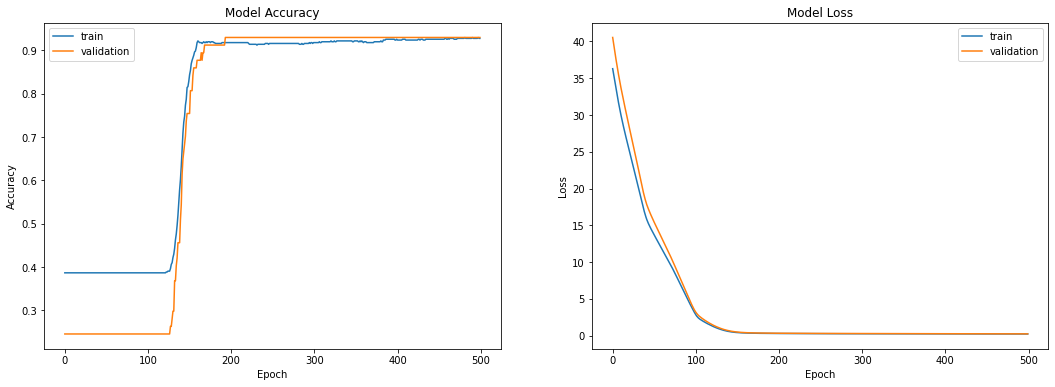

In [16]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))

# Left plot (Accuracy)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.title.set_text('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'validation'])


# Right plot (Loss)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.title.set_text('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'validation'])